# Time Series Data

Visualizing time series data can help you understand patterns, trends, and seasonal effects. Here are some common ways to visualize time series data using Matplotlib:

## 1. Basic Line Plot
A simple line plot is often the most straightforward way to visualize time series data.

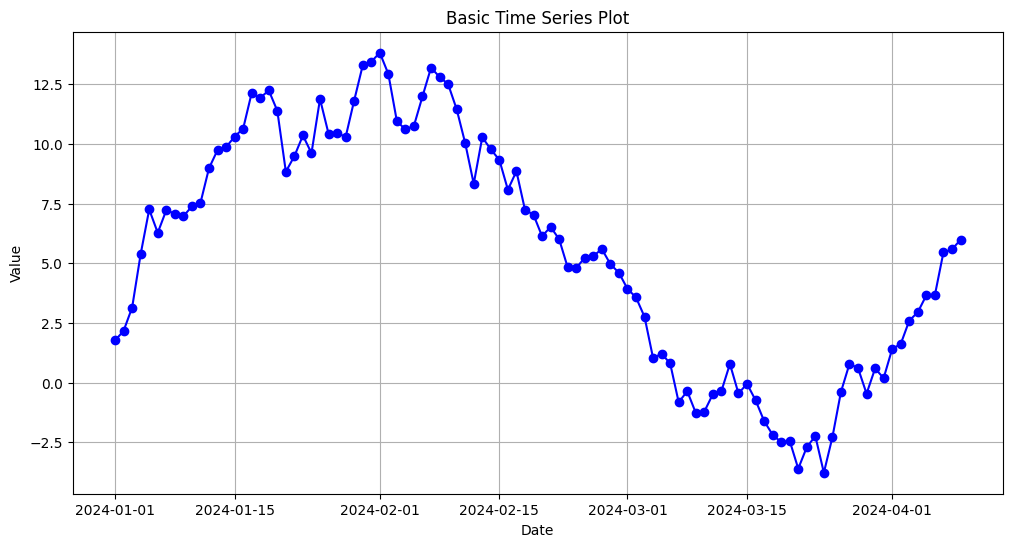

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generate sample time series data
np.random.seed(0)
dates = pd.date_range(start='2024-01-01', periods=100)
values = np.random.randn(100).cumsum()

# Create a DataFrame
data = pd.DataFrame({'Date': dates, 'Value': values})
data.set_index('Date', inplace=True)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Value'], marker='o', linestyle='-', color='b')
plt.title('Basic Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

## 2. Time Series with Multiple Lines
Plot multiple time series on the same plot to compare them.

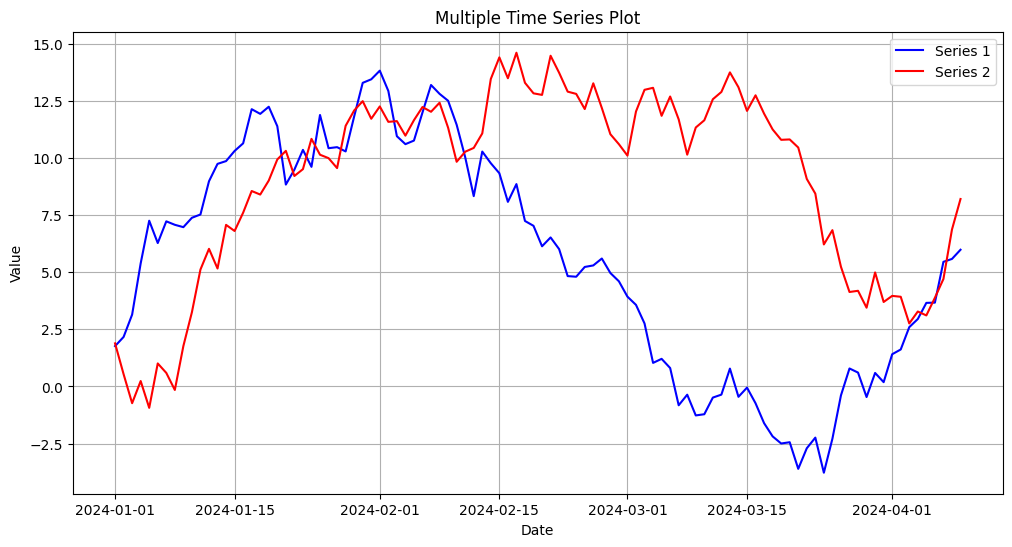

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generate sample time series data
np.random.seed(0)
dates = pd.date_range(start='2024-01-01', periods=100)
values1 = np.random.randn(100).cumsum()
values2 = np.random.randn(100).cumsum()

# Create a DataFrame
data = pd.DataFrame({'Date': dates, 'Series1': values1, 'Series2': values2})
data.set_index('Date', inplace=True)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Series1'], label='Series 1', color='b')
plt.plot(data.index, data['Series2'], label='Series 2', color='r')
plt.title('Multiple Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## 3. Time Series with Rolling Average
Add a rolling average to smooth out short-term fluctuations and highlight longer-term trends.

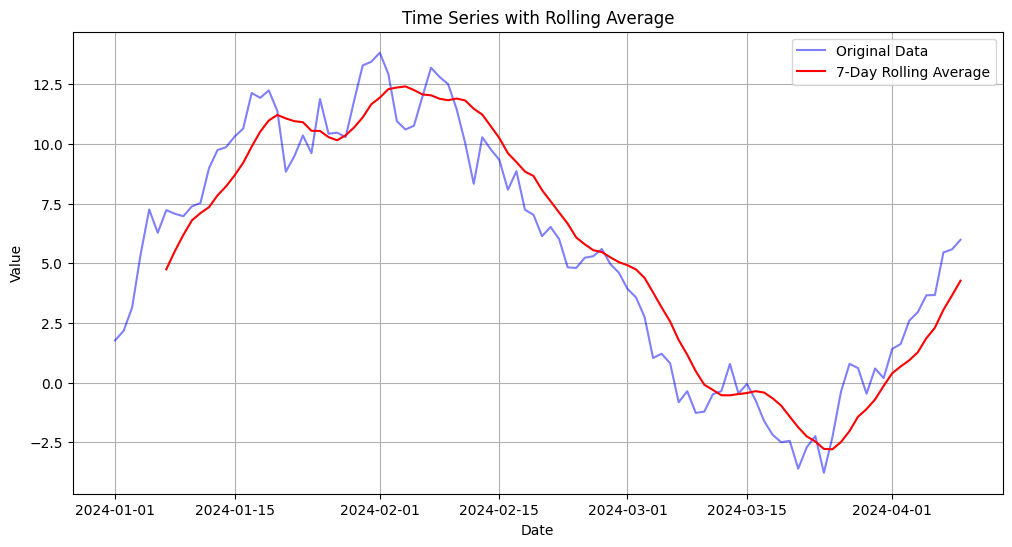

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generate sample time series data
np.random.seed(0)
dates = pd.date_range(start='2024-01-01', periods=100)
values = np.random.randn(100).cumsum()

# Create a DataFrame
data = pd.DataFrame({'Date': dates, 'Value': values})
data.set_index('Date', inplace=True)

# Compute rolling average
data['Rolling_Mean'] = data['Value'].rolling(window=7).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Value'], label='Original Data', color='b', alpha=0.5)
plt.plot(data.index, data['Rolling_Mean'], label='7-Day Rolling Average', color='r')
plt.title('Time Series with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## 4. Time Series with Seasonal Decomposition
Decompose a time series into trend, seasonal, and residual components.

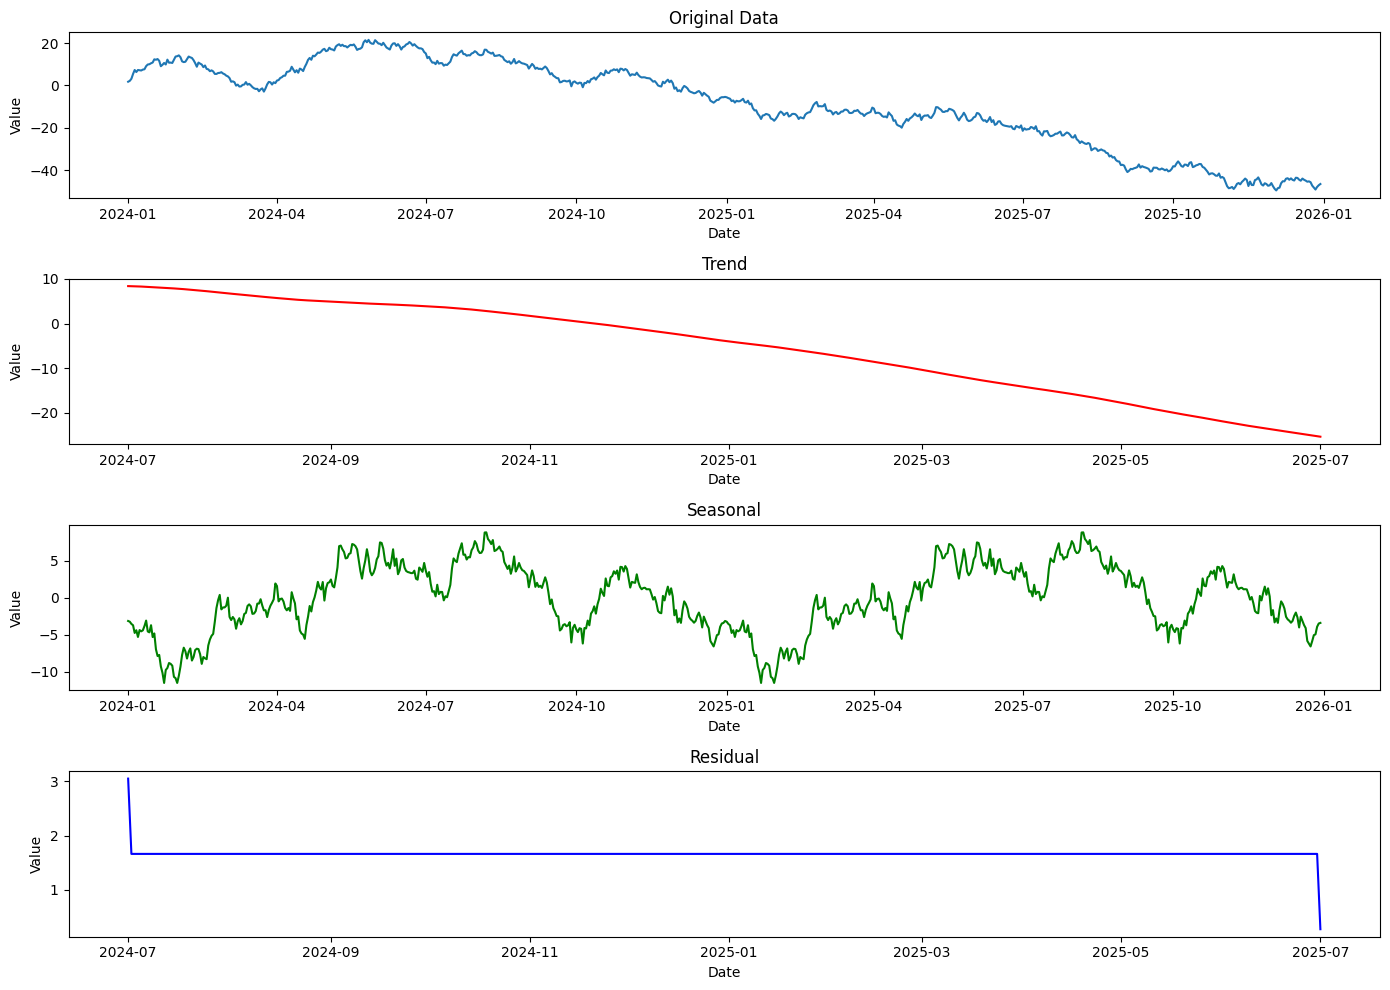

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate sample time series data with seasonality
np.random.seed(0)
dates = pd.date_range(start='2024-01-01', periods=730)
values = np.sin(np.linspace(0, 3 * np.pi, 730)) + np.random.randn(730).cumsum()

# Create a DataFrame
data = pd.DataFrame({'Date': dates, 'Value': values})
data.set_index('Date', inplace=True)

# Decompose the time series
decomposition = seasonal_decompose(data['Value'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(data.index, data['Value'], label='Original Data')
plt.title('Original Data')
plt.xlabel('Date')
plt.ylabel('Value')

plt.subplot(4, 1, 2)
plt.plot(data.index, trend, label='Trend', color='r')
plt.title('Trend')
plt.xlabel('Date')
plt.ylabel('Value')

plt.subplot(4, 1, 3)
plt.plot(data.index, seasonal, label='Seasonal', color='g')
plt.title('Seasonal')
plt.xlabel('Date')
plt.ylabel('Value')

plt.subplot(4, 1, 4)
plt.plot(data.index, residual, label='Residual', color='b')
plt.title('Residual')
plt.xlabel('Date')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

## 5. Time Series Heatmap
Visualize a time series as a heatmap to observe patterns over time.

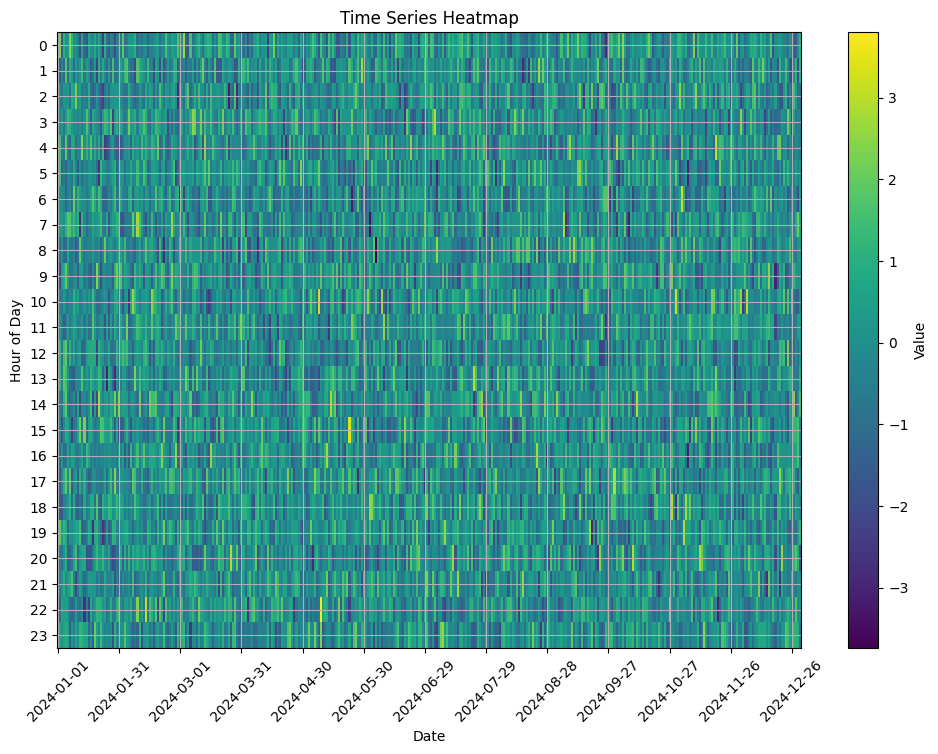

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generate sample data
np.random.seed(0)
dates = pd.date_range(start='2024-01-01', periods=365)
data = pd.DataFrame(np.random.randn(365, 24), index=dates)

# Plot heatmap
plt.figure(figsize=(12, 8))
plt.imshow(data.T, aspect='auto', cmap='viridis', interpolation='none')
plt.colorbar(label='Value')
plt.title('Time Series Heatmap')
plt.xlabel('Date')
plt.ylabel('Hour of Day')
plt.xticks(ticks=np.arange(0, len(dates), 30), labels=dates.strftime('%Y-%m-%d')[::30], rotation=45)
plt.yticks(ticks=np.arange(0, 24), labels=np.arange(24))
plt.grid(True)
plt.show()

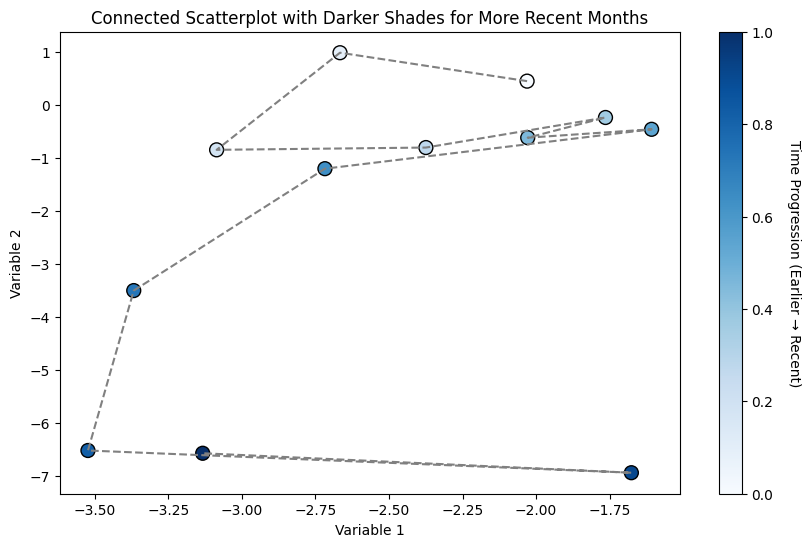

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm

# Generate sample data
dates = pd.date_range(start='2023-01-01', periods=12, freq='ME')  # Monthly data for 12 months
values1 = np.random.randn(12).cumsum()  # First variable (e.g., Sales)
values2 = np.random.randn(12).cumsum()  # Second variable (e.g., Revenue)

# Create a DataFrame
data = pd.DataFrame({'Date': dates, 'Variable 1': values1, 'Variable 2': values2})

# Normalize time progression for coloring (later months are darker)
colors = np.linspace(0, 1, len(data))

# Create a connected scatterplot
plt.figure(figsize=(10, 6))

# Scatter plot with color intensity based on time
sc = plt.scatter(data['Variable 1'], data['Variable 2'], c=colors, cmap='Blues', s=100, edgecolor='black')

# Plot connected lines
plt.plot(data['Variable 1'], data['Variable 2'], color='gray', linestyle='--')

# Add a color bar to show the gradient of time
cbar = plt.colorbar(sc)
cbar.set_label('Time Progression (Earlier → Recent)', rotation=270, labelpad=20)

# Titles and labels
plt.title('Connected Scatterplot with Darker Shades for More Recent Months')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')

plt.show()